# Lab 9
# Ensemble Learning
## Submitted to: Prof. Sweetlin Hemlatha
## Submitted by: Prateek Singh (15BCE1091)

In [15]:
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [7]:
white_wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')
red_wine_data = pd.read_csv('../Dataset/winequality-red.csv', sep=';')

wine_data = pd.concat([white_wine_data, red_wine_data])

bins = [1, 4, 6, 10]
labels = [0, 1, 2]
wine_data['quality_category'] = pd.cut(wine_data['quality'],
                                  bins=bins,
                                  labels=labels,
                                  include_lowest=True)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [12]:
features = wine_data.iloc[:, :11]
features.head()

labels = wine_data['quality_category']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=0)

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 5197 samples
Testing set has 1300 samples


In [ ]:
def train_predict_evaluate(learner, sample_size, X_train, Y_train, X_test, Y_test):
    results = {}
    start = time()
    learner = learner.fit(X_train, Y_train)
    end = time()
    
    results['train_time'] = end - start
    
    

In [19]:
simpleTree = DecisionTreeClassifier(max_depth=5)
simpleTree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
gbmTree = GradientBoostingClassifier(max_depth=5)
gbmTree.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [20]:
rfTree = RandomForestClassifier(max_depth=5)
rfTree.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Evaluating Classifier Performance

In [25]:
simpleTreePerformance = precision_recall_fscore_support(Y_test,
                                                        simpleTree.predict(X_test))
simpleTreePerformance

(array([0.75      , 0.82544104, 0.51598174]),
 array([0.05660377, 0.89346734, 0.4484127 ]),
 array([0.10526316, 0.85810811, 0.47983015]),
 array([ 53, 995, 252]))

In [26]:
gbmTreePerformance = precision_recall_fscore_support(Y_test,
                                                     gbmTree.predict(X_test))
gbmTreePerformance

(array([0.6       , 0.84615385, 0.73255814]),
 array([0.11320755, 0.95075377, 0.5       ]),
 array([0.19047619, 0.89540937, 0.59433962]),
 array([ 53, 995, 252]))

In [27]:
rfTreePerformance = precision_recall_fscore_support(Y_test,
                                                    rfTree.predict(X_test))
rfTreePerformance

/home/prateek/anaconda3/envs/dltf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.        , 0.79801325, 0.65217391]),
 array([0.        , 0.96884422, 0.23809524]),
 array([0.        , 0.87517022, 0.34883721]),
 array([ 53, 995, 252]))

In [57]:
print('Precision, Recall, Fscore, and Support for each class in simple, gradient boosted, and random forest tree classifiers:'+'\n')
for treeMethod in [simpleTreePerformance,gbmTreePerformance,rfTreePerformance]:
    print('Precision: ',treeMethod[0])
    print('Recall: ',treeMethod[1])
    print('Fscore: ',treeMethod[2])
    print('Support: ',treeMethod[3],'\n')

Precision, Recall, Fscore, and Support for each class in simple, gradient boosted, and random forest tree classifiers:

Precision:  [0.75       0.82544104 0.51598174]
Recall:  [0.05660377 0.89346734 0.4484127 ]
Fscore:  [0.10526316 0.85810811 0.47983015]
Support:  [ 53 995 252] 

Precision:  [0.6        0.84615385 0.73255814]
Recall:  [0.11320755 0.95075377 0.5       ]
Fscore:  [0.19047619 0.89540937 0.59433962]
Support:  [ 53 995 252] 

Precision:  [0.         0.79801325 0.65217391]
Recall:  [0.         0.96884422 0.23809524]
Fscore:  [0.         0.87517022 0.34883721]
Support:  [ 53 995 252] 



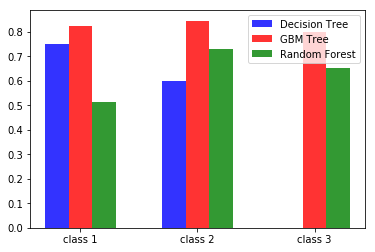

In [49]:
classifiers = [simpleTreePerformance, gbmTreePerformance, rfTreePerformance]

n_classes=3
index = np.arange(n_classes)
bar_width = 0.2
opacity = 0.8
class1= [i[0][0] for i in classifiers]
class2= [i[0][1] for i in classifiers]
class3= [i[0][2] for i in classifiers]

rects1 = plt.bar(index, class1, bar_width, alpha=opacity, color='b', label='Decision Tree')
rects2 = plt.bar(index + bar_width, class2, bar_width, alpha=opacity, color='r', label='GBM Tree')
rects1 = plt.bar(index + 2*bar_width, class3, bar_width, alpha=opacity, color='g', label='Random Forest')
plt.xticks(index + bar_width, ('class 1', 'class 2', 'class 3'))
plt.legend()

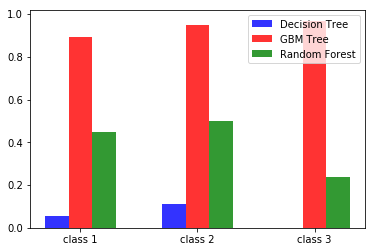

In [50]:
class1= [i[1][0] for i in classifiers]
class2= [i[1][1] for i in classifiers]
class3= [i[1][2] for i in classifiers]

rects1 = plt.bar(index, class1, bar_width, alpha=opacity, color='b', label='Decision Tree')
rects2 = plt.bar(index + bar_width, class2, bar_width, alpha=opacity, color='r', label='GBM Tree')
rects1 = plt.bar(index + 2*bar_width, class3, bar_width, alpha=opacity, color='g', label='Random Forest')
plt.xticks(index + bar_width, ('class 1', 'class 2', 'class 3'))
plt.legend()

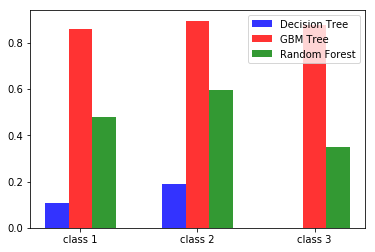

In [53]:
class1= [i[2][0] for i in classifiers]
class2= [i[2][1] for i in classifiers]
class3= [i[2][2] for i in classifiers]

rects1 = plt.bar(index, class1, bar_width, alpha=opacity, color='b', label='Decision Tree')
rects2 = plt.bar(index + bar_width, class2, bar_width, alpha=opacity, color='r', label='GBM Tree')
rects1 = plt.bar(index + 2*bar_width, class3, bar_width, alpha=opacity, color='g', label='Random Forest')
plt.xticks(index + bar_width, ('class 1', 'class 2', 'class 3'))
plt.legend()

In [54]:
print('Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:')
print('Simple Tree:\n',confusion_matrix(Y_test,simpleTree.predict(X_test)),'\n')
print('Gradient Boosted:\n',confusion_matrix(Y_test,gbmTree.predict(X_test)),'\n')
print('Random Forest:\n',confusion_matrix(Y_test,rfTree.predict(X_test)))

Confusion Matrix for simple, gradient boosted, and random forest tree classifiers:
Simple Tree:
 [[  3  49   1]
 [  1 889 105]
 [  0 139 113]] 

Gradient Boosted:
 [[  6  46   1]
 [  4 946  45]
 [  0 126 126]] 

Random Forest:
 [[  0  52   1]
 [  0 964  31]
 [  0 192  60]]


So, now that we know that the GBM tree is our favored classifier for predicting the tastiness of wines. GBM trees produce interpretable results, so we can call the feature_importances method against the GBM tree object and find out which features play the largest role in predicting tastiness.

In [56]:
print('Feature Importances for GBM tree\n')
for importance,feature in zip(gbmTree.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))


Feature Importances for GBM tree

fixed acidity: 0.07266209290311769
volatile acidity: 0.09686352995424061
citric acid: 0.07400598128203767
residual sugar: 0.08346647919160737
chlorides: 0.09642196074703188
free sulfur dioxide: 0.08908900243321564
total sulfur dioxide: 0.10157934180761936
density: 0.10841709274945117
pH: 0.08082887598433434
sulphates: 0.07935625155693848
alcohol: 0.11730939139040583
